In [6]:
# Import necessary libraries
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import cv2
import os

# Step 1: Load CIFAR-10 dataset
(x_train, _), _ = cifar10.load_data()

# Step 2: Initialize VGG16 for feature extraction
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Step 3: Create directory to save features
save_dir = "/content/extracted_features"  # Path for Google Colab
os.makedirs(save_dir, exist_ok=True)

# Step 4: Function to preprocess and extract features in batches
def extract_and_save_features(images, batch_size=500, save_dir=save_dir):
    for i in range(0, len(images), batch_size):
        batch = images[i:i + batch_size]

        # Resize images to (224, 224) for VGG16
        batch_resized = np.array([cv2.resize(img, (224, 224)) for img in batch])

        # Normalize images for VGG16
        batch_preprocessed = preprocess_input(batch_resized)

        # Extract features using VGG16
        batch_features = vgg_model.predict(batch_preprocessed)

        # Flatten features
        batch_features = batch_features.reshape(batch_features.shape[0], -1)

        # Save batch features to a .npy file
        file_path = os.path.join(save_dir, f"features_batch_{i // batch_size}.npy")
        np.save(file_path, batch_features)
        print(f"Saved batch {i // batch_size} to {file_path}")

# Step 5: Extract and save features batch-by-batch
extract_and_save_features(x_train, batch_size=1000)

# Step 6: Function to load all saved features from disk
def load_all_features(feature_dir=save_dir):
    # List all .npy files and sort them to maintain batch order
    feature_files = sorted([os.path.join(feature_dir, f) for f in os.listdir(feature_dir) if f.endswith('.npy')])

    # Load and combine features
    features = [np.load(file) for file in feature_files]
    return np.vstack(features)  # Combine all batches

# Step 7: Load combined features
features = load_all_features()
print("Combined features shape:", features.shape)  # (50000, feature_size)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 252ms/step
Saved batch 0 to /content/extracted_features/features_batch_0.npy
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step
Saved batch 1 to /content/extracted_features/features_batch_1.npy
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step
Saved batch 2 to /content/extracted_features/features_batch_2.npy
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step
Saved batch 3 to /content/extracted_features/features_batch_3.npy
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step
Saved batch 4 to /content/extracted_features/features_batch_4.npy
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step
Saved batch 5 to /content/extracted_features/features_batch_5.npy
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step
Saved batch 6 to /content/extracted_features/features_batch_6.npy
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step
Saved batch 7 to /content/extracted_features/features_batch_7.npy
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/ste

Silhouette Score: -0.013000808


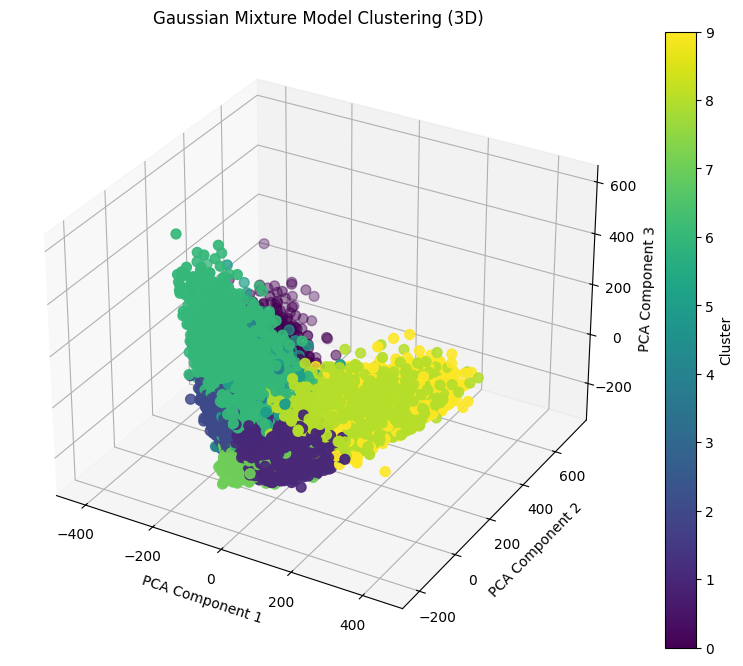

In [24]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Assuming reduced_features is your feature dataset
# Apply GMM
gmm = GaussianMixture(n_components=10, covariance_type='full', random_state=42)  # Adjust n_components
cluster_labels = gmm.fit_predict(reduced_features)

# Compute Silhouette Score
silhouette_avg = silhouette_score(reduced_features, cluster_labels)
print("Silhouette Score:", silhouette_avg)

# Reduce dimensions to 3D using PCA
reduced_3d = PCA(n_components=3).fit_transform(reduced_features)

# Plot clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(
    reduced_3d[:, 0],
    reduced_3d[:, 1],
    reduced_3d[:, 2],
    c=cluster_labels,
    cmap='viridis',
    s=50
)

# Add labels and colorbar
ax.set_title("Gaussian Mixture Model Clustering (3D)")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
fig.colorbar(scatter, label="Cluster")
plt.show()


Displaying images for Cluster 0


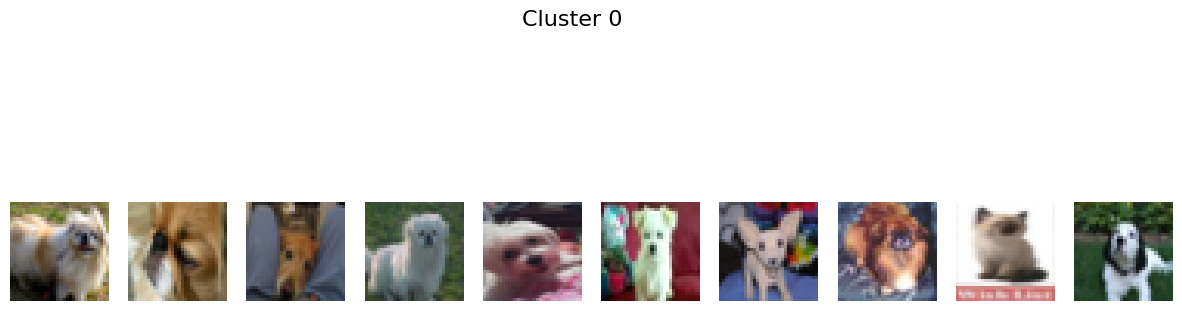

Displaying images for Cluster 1


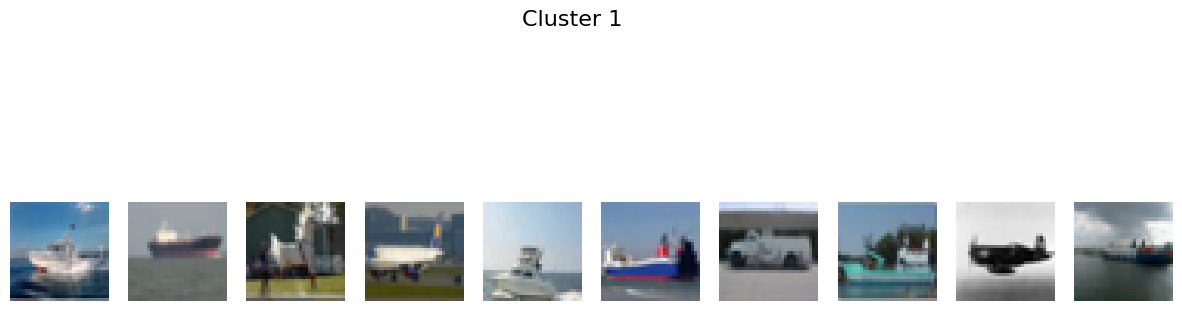

Displaying images for Cluster 2


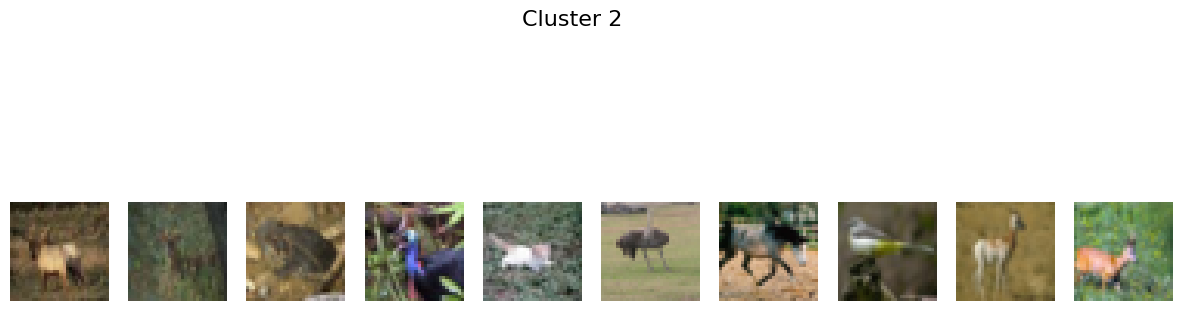

Displaying images for Cluster 3


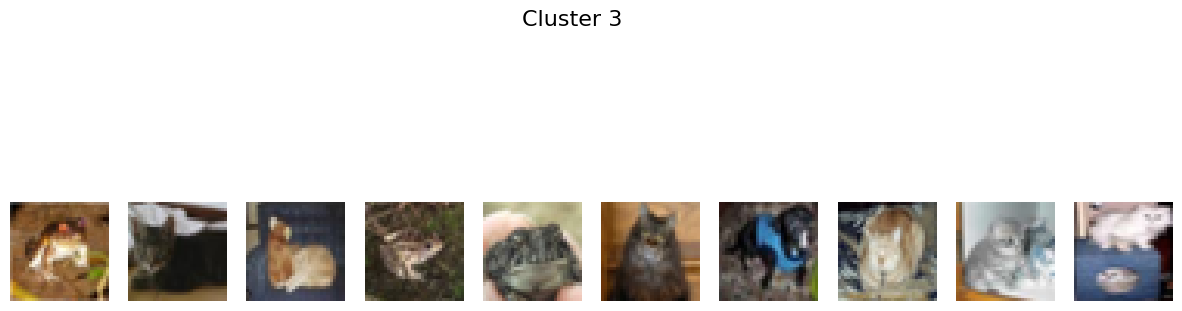

Displaying images for Cluster 4


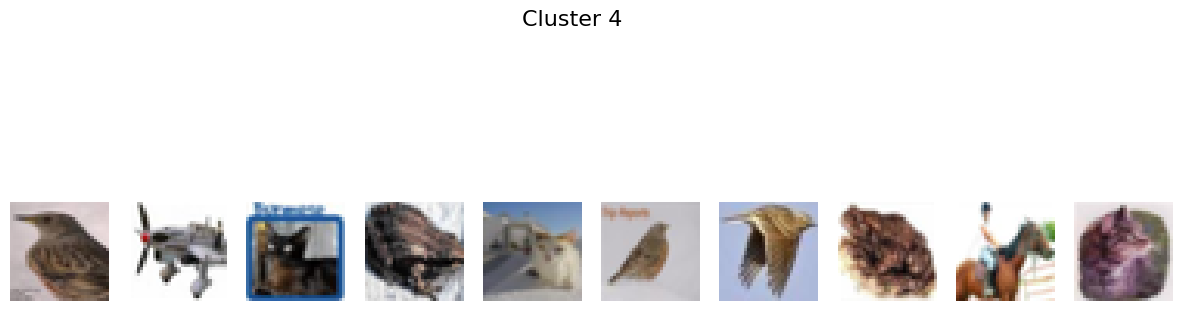

Displaying images for Cluster 5


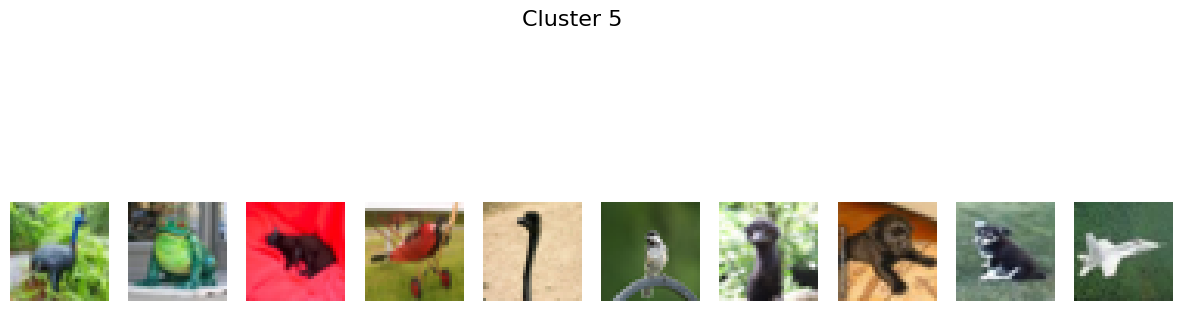

Displaying images for Cluster 6


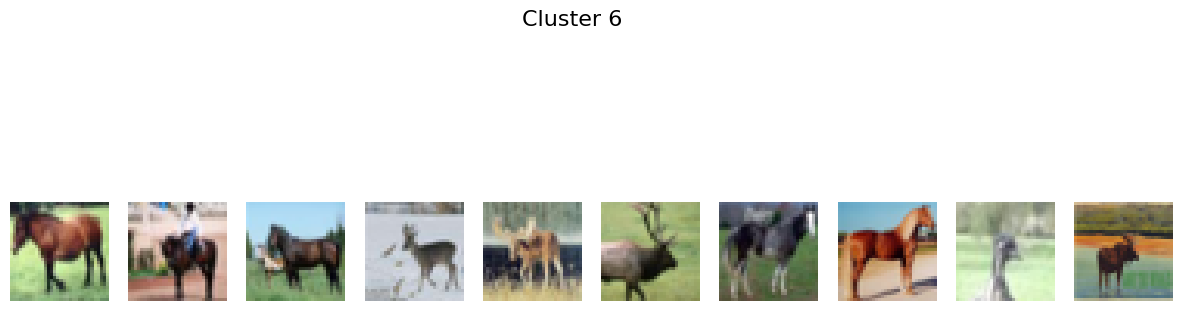

Displaying images for Cluster 7


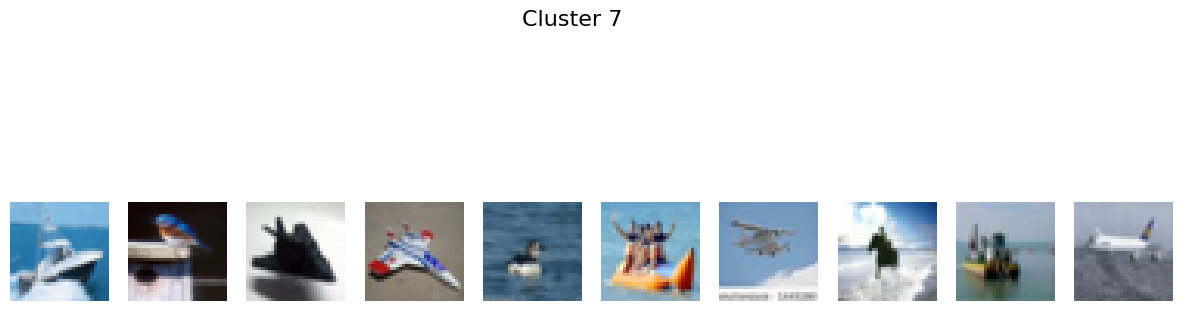

Displaying images for Cluster 8


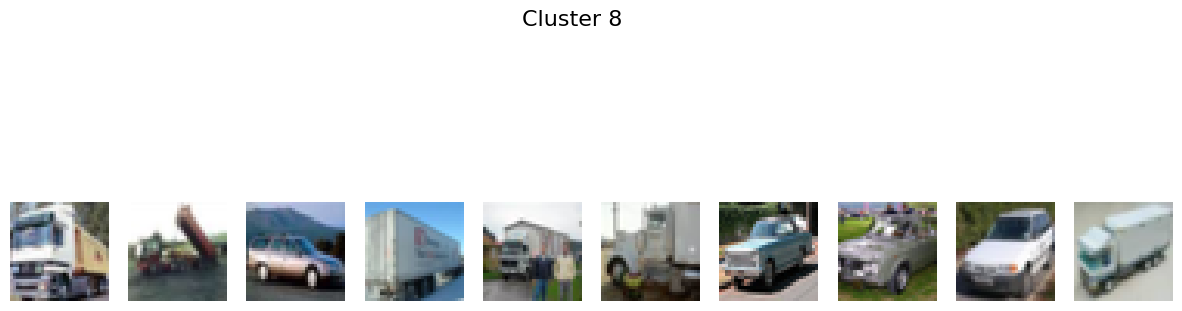

Displaying images for Cluster 9


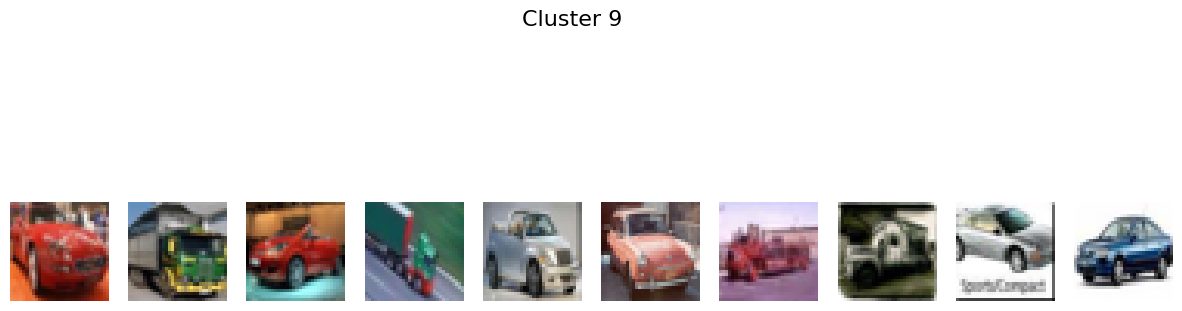

In [25]:
# Organize images by cluster
clusters = defaultdict(list)
for idx, label in enumerate(cluster_labels):
    clusters[label].append(idx)

# Visualize 10 sample images from each cluster
def display_cluster_images(cluster_id, num_images=10):
    if cluster_id not in clusters:
        print(f"Cluster {cluster_id} not found.")
        return

    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(clusters[cluster_id][:num_images]):
        img = x_train[idx]
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)  # Assuming images are in RGB format
        plt.axis('off')
    plt.suptitle(f"Cluster {cluster_id}", fontsize=16)
    plt.show()

# Display 10 images for each cluster
for cluster_id in np.unique(cluster_labels):
    print(f"Displaying images for Cluster {cluster_id}")
    display_cluster_images(cluster_id=cluster_id, num_images=10)